# Exercise 1: Basic image processing

In [1]:
from UZ_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt

### a) Display the picture umbrellas.jpg

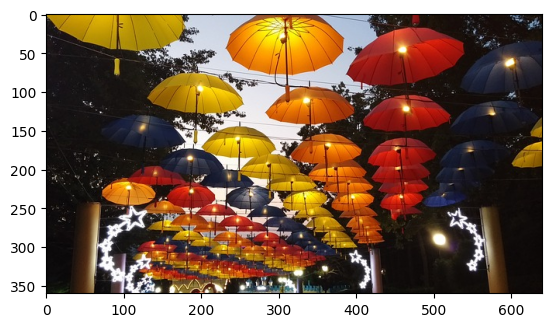

In [2]:
I = imread("images/umbrellas.jpg")
imshow(I)

In [3]:
height, width, channels = I.shape
print(height, width, channels, I.dtype)

360 640 3 float64


### b) Convert the loaded image to greyscale

(360, 640, 3)


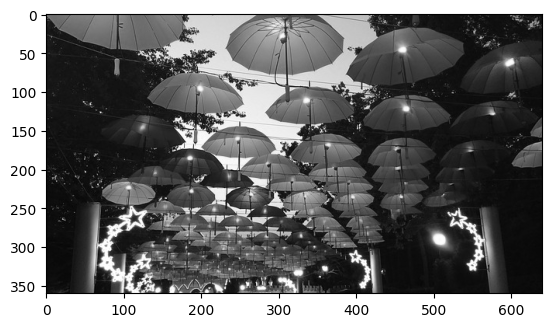

In [4]:
for i in range(I.shape[0]):             # height
    for j in range(I.shape[1]):         # width
        sum = 0
        
        for k in range(I.shape[2]):     # rgb values
            sum += I[i, j, k]
        average = float(sum / 3)

        for k in range(I.shape[2]):     # write the average value back
            I[i, j, k] = average

print(I.shape)
imshow(I)

### c) Cut and display a specific part of the loaded image

Q: Why would you use different color maps? \
A: They allow for more efficient processing and sometimes help to hide unnecessary details or uncover things that we wouldn't see if we weren't able to change color maps. For example when we only care about a shape of an object, the RGB color map doesn't make much sense, as it is easier to process the image in greyscale. Different colormaps also make processing easier in some cases, or even simplify the algorithms needed to process it.

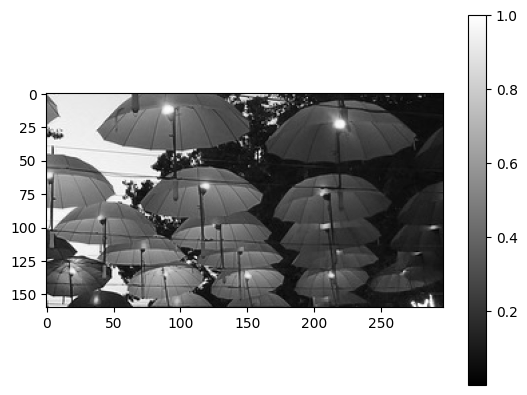

In [5]:
cutout = I[100:260, 245:542, 0]
imshow(cutout)
#plt.imshow(cutout, cmap="gray")

### d) Write a script that inverts a rectangular part of the image

Q: How is inverting a greyscale value defined for uint8? \
A: It is defined as subtracting the value from 255

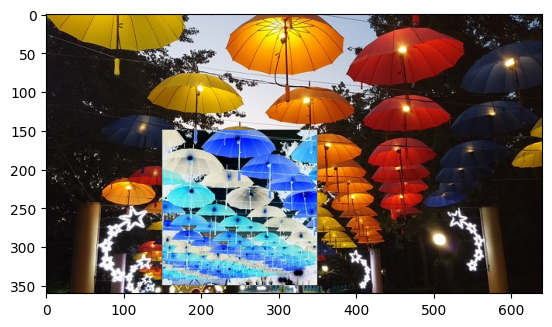

In [6]:
I = imread("images/umbrellas.jpg")

I[150:350, 150:350, :] = 1 - I[150:350, 150:350, :]

#Icpy = I.copy()
#Icpy = Icpy.astype(np.uint8)
#Icpy[50:150, 50:150, :] = 255 - Icpy[50:150, 50:150, :]


plt.imshow(I)

### e) Perform a reduction of grayscale levels in the image

Text(0.5, 1.0, 'Reduced greyscale')

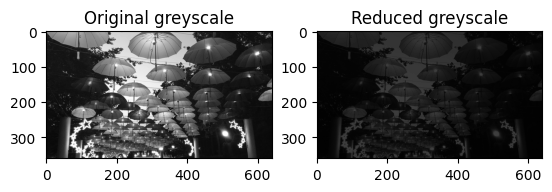

In [7]:
I = cv2.imread("images/umbrellas.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = I.astype(np.float64)

original = np.copy(I)

I = I * 63 / 255

I = I.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(original)
plt.title("Original greyscale")

plt.subplot(1,2,2)
plt.imshow(I, vmax=255)
plt.title("Reduced greyscale")


# Exercise 2: Thresholding and histograms

In [8]:
img = cv2.imread("images/bird.jpg")

### a) Create a binary mask from a grayscale image

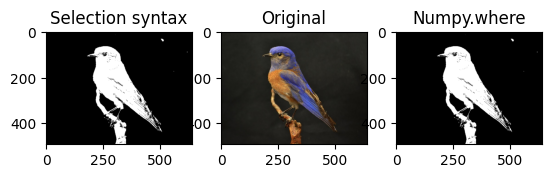

In [9]:
img = cv2.imread("images/bird.jpg")
original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.copy(img)

threshold = 47

# Numpy indexing
positive_mask = img > threshold
negative_mask = img <= threshold

img[positive_mask] = 1
img[negative_mask] = 0

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Selection syntax")

plt.subplot(1,3,2)
plt.imshow(original)
plt.title("Original")

# Numpy.where
img2 = np.where(img2 > threshold, 1, 0)
plt.subplot(1,3,3)
plt.imshow(img2)
plt.title("Numpy.where")

plt.show()

### b) Write a function that accepts a grayscale image and the number of bins that will be used in building a histogram. The function should return a 1D array representing the image histogram.

Q: The histograms are usually normalized by dividing the result by the sum of all cells. Why is that? \
A: To adjust the scale of levels of gray and get a better representation of color composition of the image. Normalization also provides us with the probability distribution of some pixel value

<BarContainer object of 100 artists>

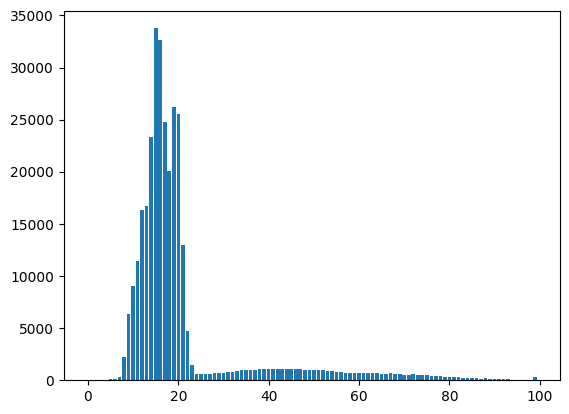

In [10]:
img = cv2.imread("images/bird.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def myhist(img, n_bins):
    H = np.zeros(n_bins)
    interval_step = 256 // n_bins

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Value of image // interval_step = bin_number
            H[min(img[i, j] // interval_step, n_bins-1)] += 1

    return H

H1 = myhist(img, n_bins=100)
tags = np.array([int(i) for i in range(len(H1))])
plt.bar(tags, H1)

# Normalized histogram 
#H = H / np.linalg.norm(H)
#plt.bar(tags, H) 

### c) Modify your function myhist to no longer assume the uint8 range for values. Instead, it should find the maximum and minimum values in the image and calculate the bin ranges based on these values. Write a script that shows the difference between both versions of the function

[ 0 , 254 ] n_bins: 20 step: 13


Text(0.5, 1.0, 'modified_hist')

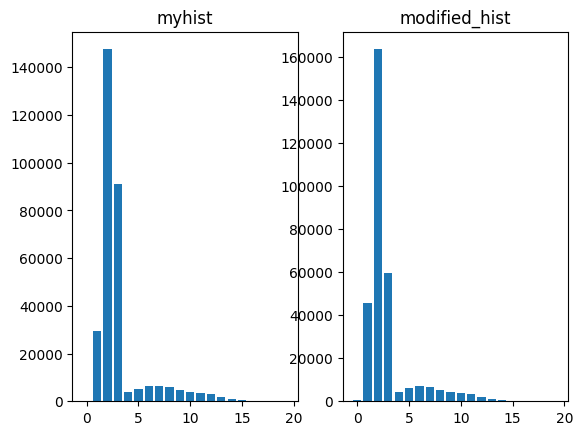

In [11]:
def modified_hist(img, n_bins):
    # Prepare histogram array
    H = np.ones(n_bins)

    # Find min and max
    a_max = np.max(img)
    a_min = np.min(img)

    # Get step based on n_bins and range
    step = int(np.ceil((a_max - a_min) / n_bins))
    print("[", a_min,",", a_max, "] n_bins:", n_bins, "step:", step)

    # Calculate histogram
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H[min(img[i,j] // step, n_bins-1)] += 1
    
    return H

H1 = myhist(img, n_bins=20)
H2 = modified_hist(img, n_bins=20)
tags = np.array([int(i) for i in range(len(H1))])

# Displays 2 bar charts on top of each other
#plt.bar(tags, H1)
#plt.bar(tags, H2)

# Display 2 bar charts one by the other
plt.subplot(1,2,1)
plt.bar(tags, H1)
plt.title("myhist")


plt.subplot(1,2,2)
plt.bar(tags, H2)
plt.title("modified_hist")

### d) Test myhist on images (three or more) of the same scene in different lighting conditions.

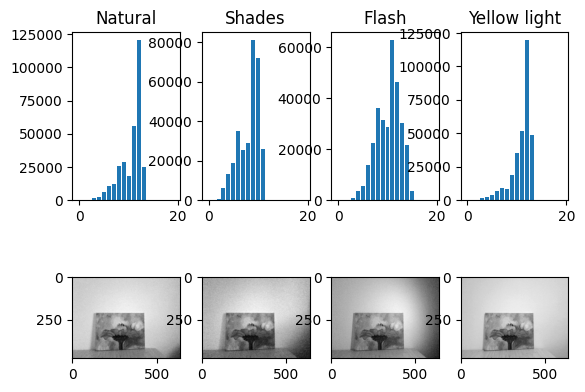

In [12]:
# Load 4 pictures of same scene and display histograms with myhist
img_flash = cv2.imread("custom_images/flash.jpg")
img_natural = cv2.imread("custom_images/natural_light.jpg")
img_natural_shades = cv2.imread("custom_images/natural_with_shades.jpg")
img_yellow = cv2.imread("custom_images/yellow_light.jpg")

# Convert to grayscale
img_flash = cv2.cvtColor(img_flash, cv2.COLOR_BGR2GRAY)
img_natural = cv2.cvtColor(img_natural, cv2.COLOR_BGR2GRAY)
img_natural_shades = cv2.cvtColor(img_natural_shades, cv2.COLOR_BGR2GRAY)
img_yellow = cv2.cvtColor(img_yellow, cv2.COLOR_BGR2GRAY)

n_bins = 20
H_flash = myhist(img_flash, n_bins)
H_natural = myhist(img_natural, n_bins)
H_natural_shades = myhist(img_natural_shades, n_bins)
H_yellow = myhist(img_yellow, n_bins)

bins = np.array([i for i in range(n_bins)])

plt.subplot(2,4,1)
plt.bar(bins, H_natural)
plt.title("Natural")

plt.subplot(2,4,5)
plt.imshow(img_natural)

plt.subplot(2,4,2)
plt.bar(bins, H_natural_shades)
plt.title("Shades")

plt.subplot(2,4,6)
plt.imshow(img_natural_shades)

plt.subplot(2,4,3)
plt.bar(bins, H_flash)
plt.title("Flash")

plt.subplot(2,4,7)
plt.imshow(img_flash)

plt.subplot(2,4,4)
plt.bar(bins, H_yellow)
plt.title("Yellow light")

plt.subplot(2,4,8)
plt.imshow(img_yellow)

plt.show()


### e) Implement Otsu's method for automatic threshold calculation. It should accept a grayscale image and return the optimal threshold (use normalized histograms). Write a script that shows the algorithm's results on different images

In [13]:
# Maximizes the between class variance
def otsu(img, n_bins):

    H, bin_edges = np.histogram(img, bins=n_bins)
    
    # Normalize histogram
    H = H / np.linalg.norm(H)

    # Get centers of intervals    
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Calculate the probabilities of both classes
    w1 = np.cumsum(H)
    w2 = np.cumsum(H[::-1])[::-1]

    # Get cluster means
    mean1 = np.cumsum(H * bin_centers) / w1
    mean2 = (np.cumsum((H * bin_centers)[::-1]) / w2[::-1])[::-1]

    # Clip ends to align class 1 and class 2 variables
    variance = w1[:-1] * w2[1:] * (mean1[:-1] - mean2[1:])**2
    
    # Get biggest variance and index the threshold
    idx = np.argmax(variance)
    thresh = bin_centers[idx]

    return thresh

Text(0.5, 1.0, 'Binarized image')

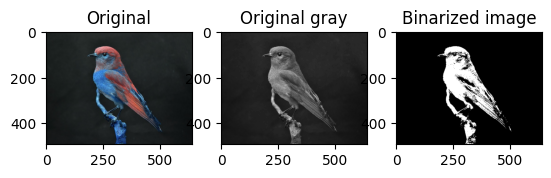

In [14]:
# Open image
image_name = "bird.jpg"
img = cv2.imread(f"images/{image_name}")

original = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
original_gray = img.copy()
img = img.astype(np.float64) / 255

otsu_threshold = otsu(img, 255)

img = np.where(img > otsu_threshold, 1, 0)

plt.subplot(1,3,1)
plt.imshow(original)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(original_gray)
plt.title("Original gray")

plt.subplot(1,3,3)
plt.imshow(img)
plt.title(f"Binarized image")


# Exercise 3: Morphological operations and regions

### a) Perform erosion and dilation on mask.png and experiment with combinations (opening, closing)

Q: Based on the results, which order of erosion and dilation operations produces opening and which closing? \
A: Erosion then dilation produces opening, as it increases the size of possible narrow areas in the picture. On the other hand dilation followed by erosion produces closing, as it fills holes and preserves the original shape

Text(0.5, 1.0, 'dilated')

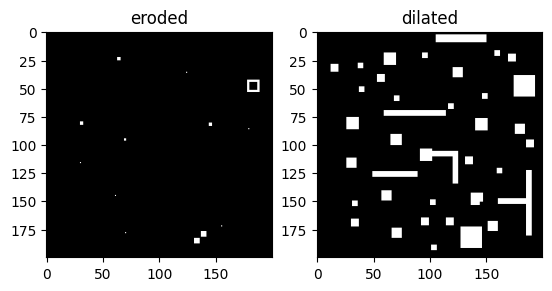

In [15]:
img = cv2.imread("images/mask.png")

n = 5
SE = np.ones((n,n), np.uint8)   # structuring element

eroded = cv2.erode(img, SE)
dilated = cv2.dilate(img, SE)

plt.subplot(1,2,1)
plt.imshow(eroded)
plt.title("eroded")

plt.subplot(1,2,2)
plt.imshow(dilated)
plt.title("dilated")


### b) Try to clean up the mask of the image bird.jpg using morphological operations.

Text(0.5, 1.0, 'Cleaned up mask')

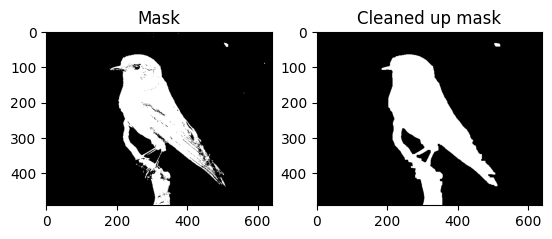

In [16]:
img = cv2.imread("images/bird.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

threshold = 47
img = np.where(img > threshold, 1, 0)
img = img.astype(np.float64)

n = 5
SE1 = np.ones((n,n), np.uint8)   # structuring element
SE2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n+10,n))

#closed = cv2.dilate(cv2.erode(img, SE2, iterations=1), SE1, iterations=3)
closed = cv2.dilate(cv2.erode(cv2.dilate(img, SE2, iterations=1), SE1, iterations=2), SE1)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Mask")

plt.subplot(1,2,2)
plt.imshow(closed)
plt.title("Cleaned up mask")


### c) (extra) Write a function immask that accepts a three channel image and a binary mask and returns an image where pixel values are set to black if the corresponding pixel in the mask is equal to 0. Otherwise, the pixel value should be equal to the corresponding image pixel. Use `np.expand_dims` function to make the mask and the image to have the same number of axes

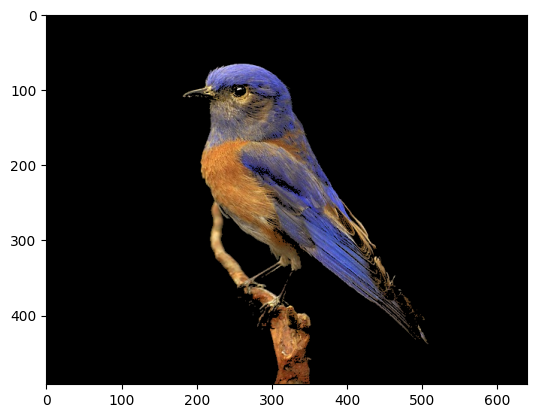

In [17]:
def immask(img, mask):
    mask = np.expand_dims(mask, 2)

    img = np.where(mask == 0, 0, img)

    return img


# Runner code
img = imread("images/bird.jpg")
mask = imread_gray("images/bird.jpg")

mask = np.where(mask > 0.21, 1, 0)   # Create mask
img = immask(img, mask)
imshow(img)

### d) Create a mask from the image in file `eagle.jpg` and visualize the result with immask (if available, otherwise just display the mask). Use Otsu's method.

Q: Why is the background included in the mask and not the object? How would you fix that in general? \
A: We color the object black and background white when creating the mask, and immask function will leave the object black while keeping the original values in background pixels. The result we got is actually what we want, as we have successfully detected the object (i.e. the eagle). In general we should have a rule whether the object should be the dark or the white pixels and design the "immask" function to include the object if that's our goal.

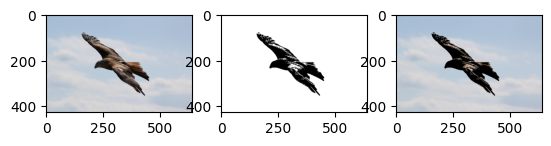

In [18]:
img = imread("images/eagle.jpg")
img_gray = imread_gray("images/eagle.jpg")

thresh = otsu(img_gray, 255)
mask = np.where(img_gray > thresh, 1, 0)

plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
plt.imshow(mask)

img = immask(img, mask)

plt.subplot(1,3,3)
plt.imshow(img)



12
[6961   82 6969  519   82   84 6316  518 6304  519 7147]


Text(0.5, 1.0, 'filtered coins')

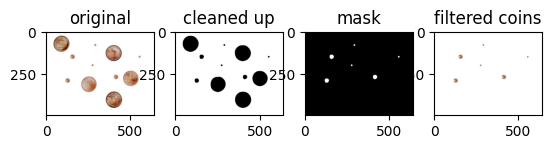

In [22]:
# Load image
img = cv2.imread("images/coins.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create mask
thresh = otsu(gray, 128)
mask = np.where(gray > thresh, 1, 0)
mask = mask.astype(np.float64)

# Clean up
n = 10
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (n,n))
img_cleaned = cv2.dilate(cv2.erode(mask, SE), SE)           # Close the gaps

img_inverted = np.where(img_cleaned == 1, 0, 1)
img_inverted = img_inverted.astype(np.uint8)

# Remove coins with area > 700 pixels
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_inverted)
# TODO - that returns only 2 labels

# Sizes are in the last column
sizes = stats[:, -1]
print(num_labels)

# Filter out the background
sizes = sizes[1:]
num_labels -= 1

# Filter out the areas > 700px
max_size = 700
res = np.zeros(img_inverted.shape)
print(sizes)

for object in range(num_labels):
    if sizes[object] <= max_size:
        res[labels == object+1] = 255   # fill in the coins

final = img.copy()
final[res==0] = 255

plt.subplot(1,4,1)
plt.imshow(img)
plt.title("original")

plt.subplot(1,4,2)
plt.imshow(img_cleaned)
plt.title("cleaned up")

plt.subplot(1,4,3)
plt.imshow(res)
plt.title("mask")

plt.subplot(1,4,4)
plt.imshow(final)
plt.title("filtered coins")
